In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [9]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2021-01-20 23:56:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.169.240, 216.58.209.144, 216.58.210.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.169.240|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: '/tmp/sarcasm.json'

     0K .......... .......... .......... .......... ..........  0%  144K 38s
    50K .......... .......... .......... .......... ..........  1% 9.31K 5m9s
   100K .......... .......... .......... .......... ..........  2% 1.55M 3m26s
   150K .......... .......... .......... .......... ..........  3% 3.22M 2m33s
   200K .......... .......... .......... .......... ..........  4% 13.6K 3m19s
   250K .......... .......... .......... .......... ..........  5%  139K 2m50s
   300K .......... .......... .......... ....

In [7]:
import os
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)
    print(os.path)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

<module 'ntpath' from 'C:\\Users\\asif1\\anaconda3\\lib\\ntpath.py'>


In [5]:
pwd

'C:\\Users\\asif1\\Git\\Deep Learning\\NLP_Zero_to_Hero'

In [8]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6565 - accuracy: 0.5987 - val_loss: 0.5512 - val_accuracy: 0.7387
Epoch 2/30
625/625 - 2s - loss: 0.4163 - accuracy: 0.8357 - val_loss: 0.3819 - val_accuracy: 0.8413
Epoch 3/30
625/625 - 2s - loss: 0.3070 - accuracy: 0.8801 - val_loss: 0.3591 - val_accuracy: 0.8457
Epoch 4/30
625/625 - 2s - loss: 0.2563 - accuracy: 0.9001 - val_loss: 0.3521 - val_accuracy: 0.8454
Epoch 5/30
625/625 - 2s - loss: 0.2197 - accuracy: 0.9164 - val_loss: 0.3452 - val_accuracy: 0.8541
Epoch 6/30
625/625 - 2s - loss: 0.1953 - accuracy: 0.9259 - val_loss: 0.3552 - val_accuracy: 0.8547
Epoch 7/30
625/625 - 2s - loss: 0.1746 - accuracy: 0.9344 - val_loss: 0.3707 - val_accuracy: 0.8501
Epoch 8/30
625/625 - 2s - loss: 0.1544 - accuracy: 0.9441 - val_loss: 0.3896 - val_accuracy: 0.8466
Epoch 9/30
625/625 - 2s - loss: 0.1408 - accuracy: 0.9491 - val_loss: 0.3960 - val_accuracy: 0.8505
Epoch 10/30
625/625 - 2s - loss: 0.1279 - accuracy: 0.9542 - val_loss: 0.4241 - val_accuracy: 0.8457

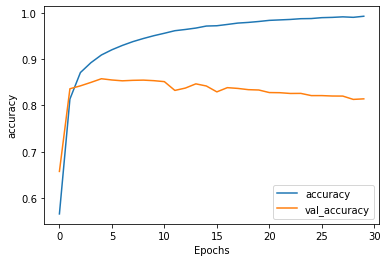

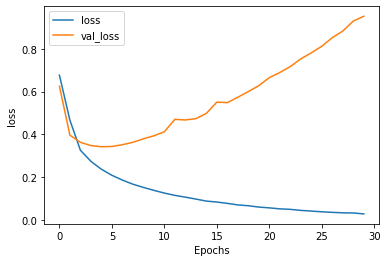

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [21]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [22]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [23]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.4816089e-01]
 [2.9930472e-04]]
